<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/AutoETS_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)



In [3]:
stock = 'META'
ticker = yf.Ticker(stock)
df = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

df

,Close
Date,
2013-01-01 00:00:00-05:00,30.887003
2013-02-01 00:00:00-05:00,27.168201
2013-03-01 00:00:00-05:00,25.503212
2013-04-01 00:00:00-04:00,27.686640
2013-05-01 00:00:00-04:00,24.276907
...,...
2023-08-01 00:00:00-04:00,295.001770
2023-09-01 00:00:00-04:00,299.308807
2023-10-01 00:00:00-04:00,300.365631


In [4]:
print(df.dtypes)


float64


In [5]:
df = df.reset_index()  # Reset the index to make 'Date' a regular column
df["ds"] = pd.to_datetime(df["Date"])  # Convert the 'Date' column to datetime and assign to 'ds'

In [6]:
!pip install statsforecast


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.7/314.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.4/271.4 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 8.5 MB/s eta 0:00:00


In [7]:
df["unique_id"]="1"
# The DataFrame has 4 columns after adding 'ds' and 'unique_id' in previous steps, modify the column names accordingly
#df.columns=["ds", "y", "unique_id"] # incorrect
# assuming the first column is 'Date' based on previous cell outputs
df.columns = ['Date', 'Close', 'ds', 'unique_id'] # Assuming original columns and new ones
# or if you want to keep only specific columns:
# df = df[['ds', 'Close', 'unique_id']]  # Keep only 'ds', 'Close', and 'unique_id' columns
# df.columns = ["ds", "y", "unique_id"] # then rename them
df.head()

,Date,Close,ds,unique_id
0,2013-01-01 00:00:00-05:00,30.887003,2013-01-01 00:00:00-05:00,1
1,2013-02-01 00:00:00-05:00,27.168201,2013-02-01 00:00:00-05:00,1
2,2013-03-01 00:00:00-05:00,25.503212,2013-03-01 00:00:00-05:00,1
3,2013-04-01 00:00:00-04:00,27.686640,2013-04-01 00:00:00-04:00,1
4,2013-05-01 00:00:00-04:00,24.276907,2013-05-01 00:00:00-04:00,1


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


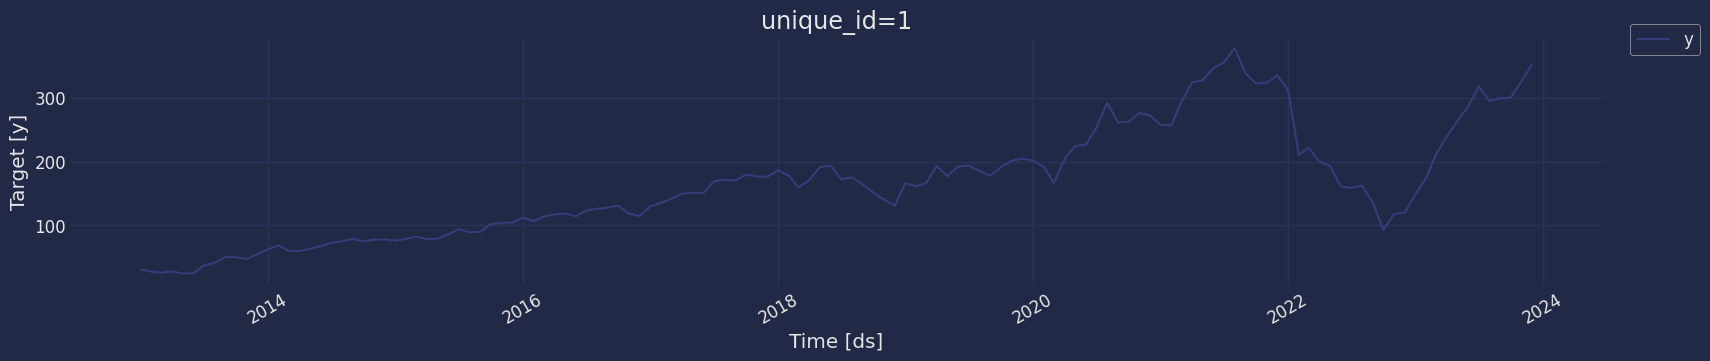

In [8]:
# Change 'Close' to 'y'
df = df.rename(columns={'Close': 'y'})

# Select only the required columns for StatsForecast.plot()
df_plot = df[['ds', 'y', 'unique_id']]

# Now plot using the modified DataFrame:
from statsforecast import StatsForecast
StatsForecast.plot(df_plot)

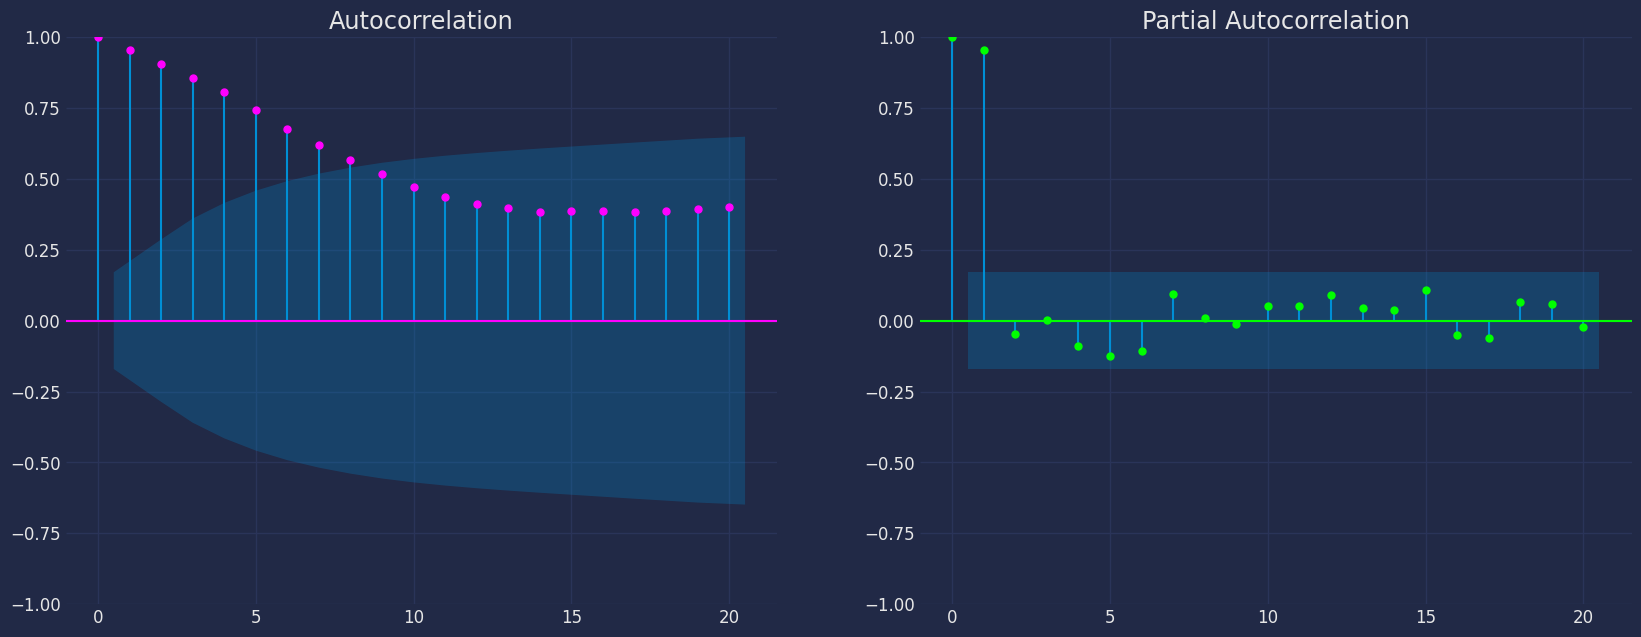

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=20, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Plot
plot_pacf(df["y"],  lags=20, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

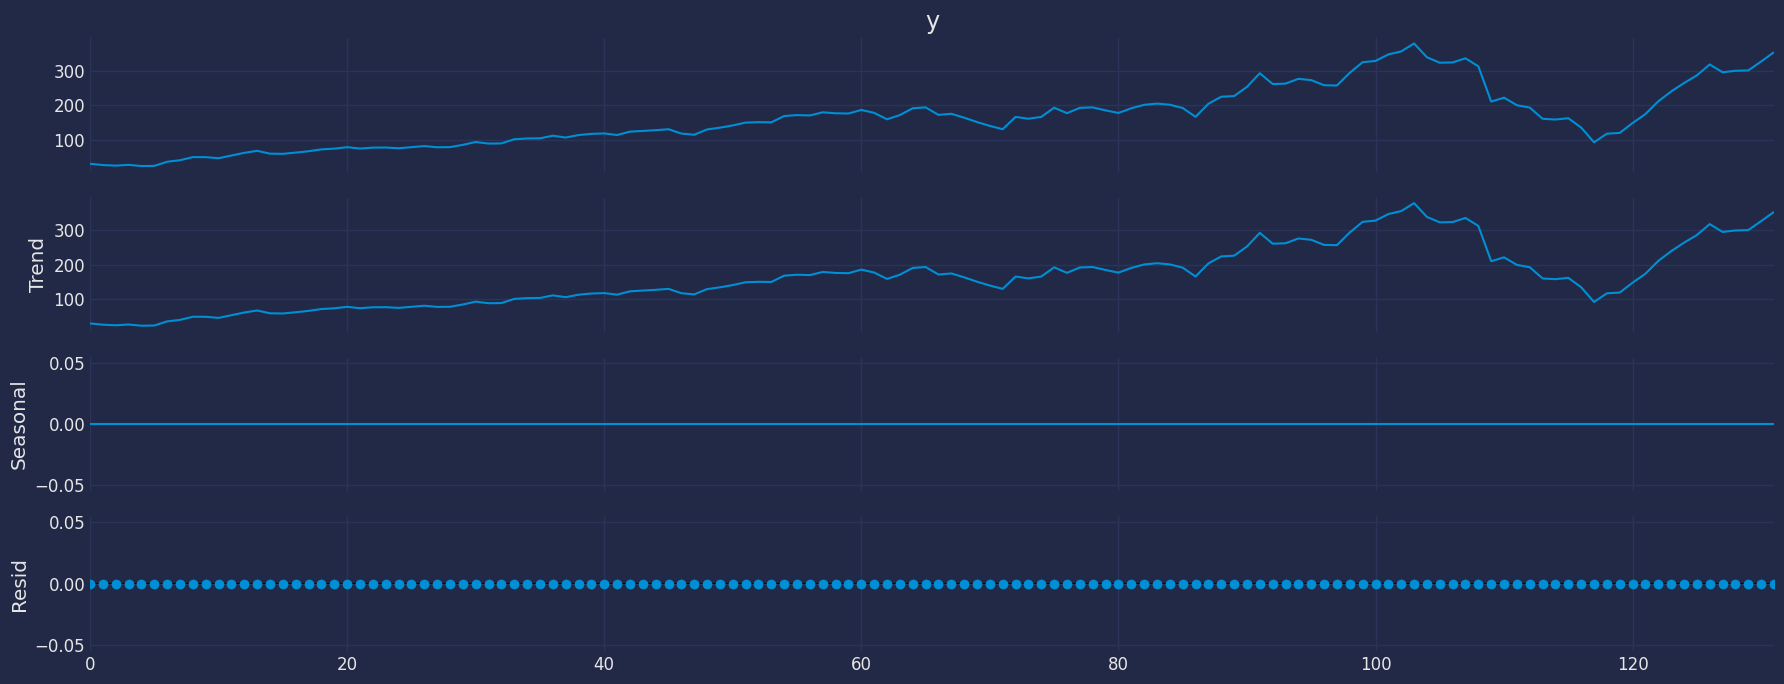

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=1)
a.plot();


### Separamos nuestra data en train y test, para despues poder pronosticar periodos y ver la exactitud o error de nuestro modelo de acuerdo a la data real.

In [11]:
train = df[df.ds<='2021-01-01']
test = df[df.ds>'2021-01-01']

In [12]:
train.shape, test.shape

((97, 4), (35, 4))

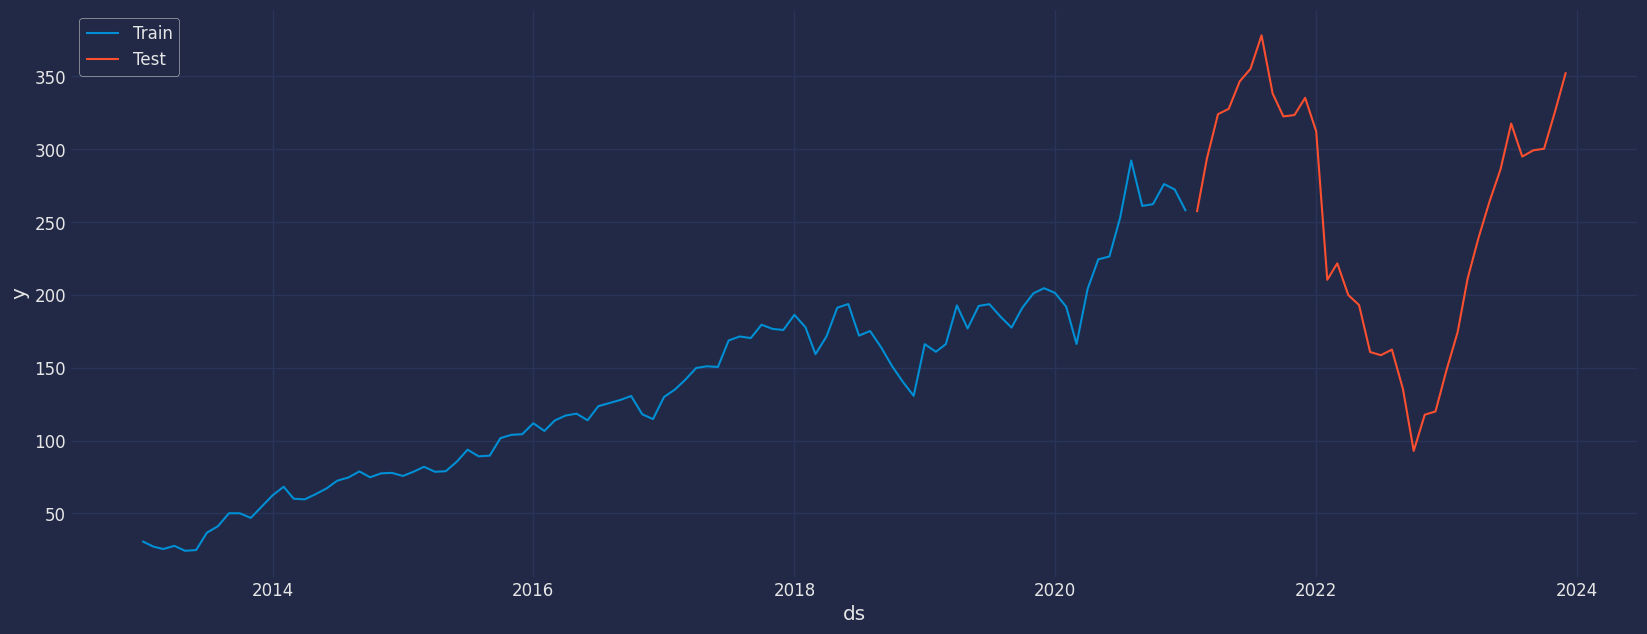

In [13]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
plt.show()

In [14]:
from statsforecast.models import AutoETS

In [15]:
autoets = AutoETS(model=["A","Z","N"],  alias="AutoETS", season_length=1)


In [16]:
autoets = autoets.fit(df["y"].values)
autoets

AutoETS

In [17]:
y_hat_dict = autoets.predict(h=6)
y_hat_dict

{'mean': array([352.89481824, 352.89481824, 352.89481824, 352.89481824,
        352.89481824, 352.89481824])}

In [18]:
forecast=pd.Series(pd.date_range("2021-01-01", freq="ys", periods=6))
forecast=pd.DataFrame(forecast)
forecast.columns=["ds"]
forecast["hat"]=y_hat_dict.get("mean")
forecast["unique_id"]="1"
forecast

<ipython-input-18-c414e12219d1>:1: FutureWarning: 'ys' is deprecated and will be removed in a future version, please use 'YS' instead.
  forecast=pd.Series(pd.date_range("2021-01-01", freq="ys", periods=6))


,ds,hat,unique_id
0,2021-01-01,352.894818,1
1,2022-01-01,352.894818,1
2,2023-01-01,352.894818,1
3,2024-01-01,352.894818,1
4,2025-01-01,352.894818,1
5,2026-01-01,352.894818,1


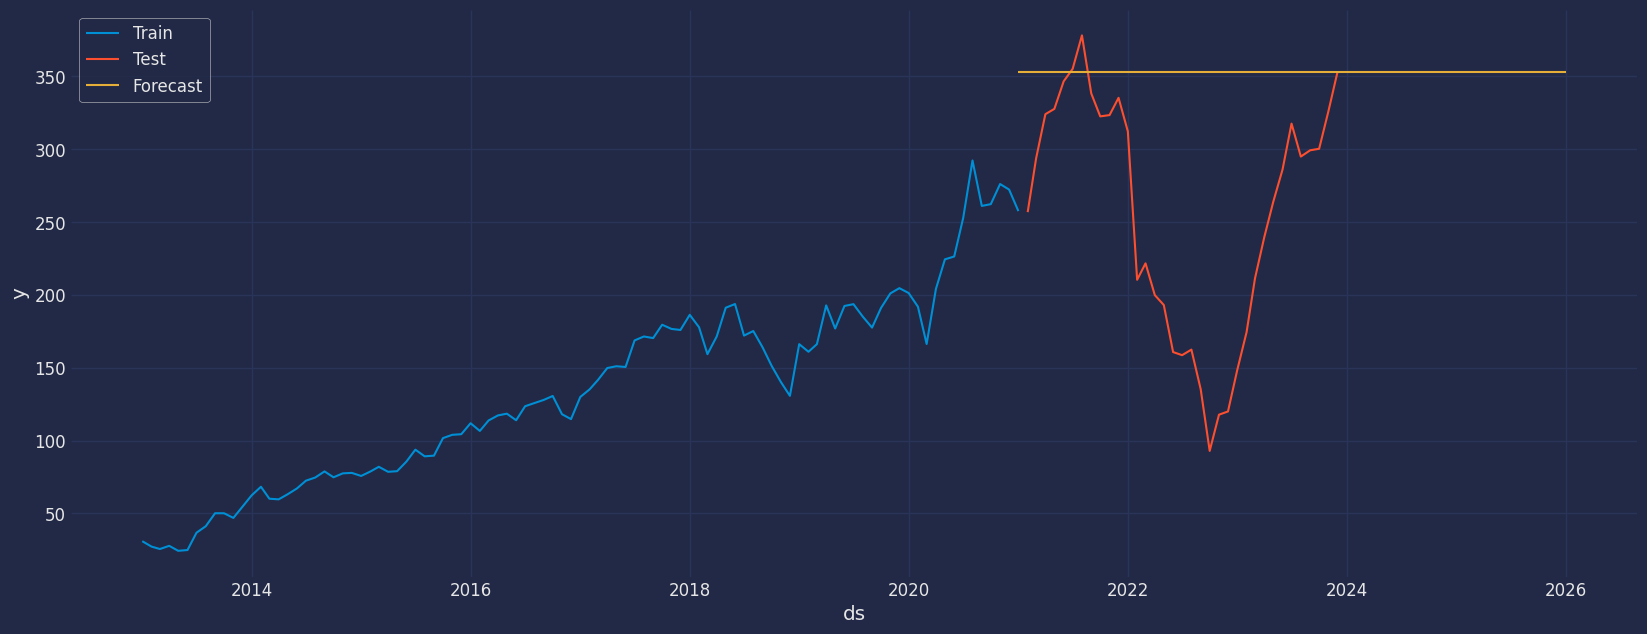

In [19]:
sns.lineplot(train,x="ds", y="y", label="Train")
sns.lineplot(test, x="ds", y="y", label="Test")
sns.lineplot(forecast,x="ds", y="hat", label="Forecast",)
plt.show()

In [20]:
y_hat_dict = autoets.predict(h=6, level=[80,90,95])
y_hat_dict

{'mean': array([352.89481824, 352.89481824, 352.89481824, 352.89481824,
        352.89481824, 352.89481824]),
 'lo-95': array([317.3557466 , 302.63749406, 291.34344414, 281.82200575,
        273.43339555, 265.84948111]),
 'lo-90': array([323.06948913, 310.71754223, 301.23927674, 293.24863376,
        286.20869016, 279.84406853]),
 'lo-80': array([329.65706833, 320.03332028, 312.64853797, 306.42280405,
        300.93778666, 295.97893155]),
 'hi-80': array([376.13256815, 385.7563162 , 393.14109851, 399.36683244,
        404.85184982, 409.81070494]),
 'hi-90': array([382.72014735, 395.07209426, 404.55035974, 412.54100272,
        419.58094632, 425.94556796]),
 'hi-95': array([388.43388988, 403.15214242, 414.44619235, 423.96763073,
        432.35624093, 439.94015537])}

In [21]:
forecast["hat"]=y_hat_dict.get("mean")

forecast["lo-80"]=y_hat_dict.get("lo-80")
forecast["hi-80"]=y_hat_dict.get("hi-80")

forecast["lo-90"]=y_hat_dict.get("lo-80")
forecast["hi-90"]=y_hat_dict.get("hi-80")

forecast["lo-95"]=y_hat_dict.get("lo-95")
forecast["hi-95"]=y_hat_dict.get("hi-95")
forecast

,ds,hat,unique_id,lo-80,hi-80,lo-90,hi-90,lo-95,hi-95
0,2021-01-01,352.894818,1,329.657068,376.132568,329.657068,376.132568,317.355747,388.433890
1,2022-01-01,352.894818,1,320.033320,385.756316,320.033320,385.756316,302.637494,403.152142
2,2023-01-01,352.894818,1,312.648538,393.141099,312.648538,393.141099,291.343444,414.446192
3,2024-01-01,352.894818,1,306.422804,399.366832,306.422804,399.366832,281.822006,423.967631
4,2025-01-01,352.894818,1,300.937787,404.851850,300.937787,404.851850,273.433396,432.356241
5,2026-01-01,352.894818,1,295.978932,409.810705,295.978932,409.810705,265.849481,439.940155


In [22]:
df=df.set_index("ds")
forecast=forecast.set_index("ds")

In [25]:
# Convert index to a series before applying tz_localize
df['ds'] = pd.to_datetime(df.index.to_series()).dt.tz_localize(None)
forecast['ds'] = pd.to_datetime(forecast.index.to_series()).dt.tz_localize(None)

# Reset index of both DataFrames to resolve ambiguity before merging
df = df.reset_index(drop=True)
forecast = forecast.reset_index(drop=True)

# Now you can perform the merge
df['unique_id'] = df['unique_id'].astype(object)
df_plot = df.merge(forecast, how='left', on=['unique_id', 'ds'])

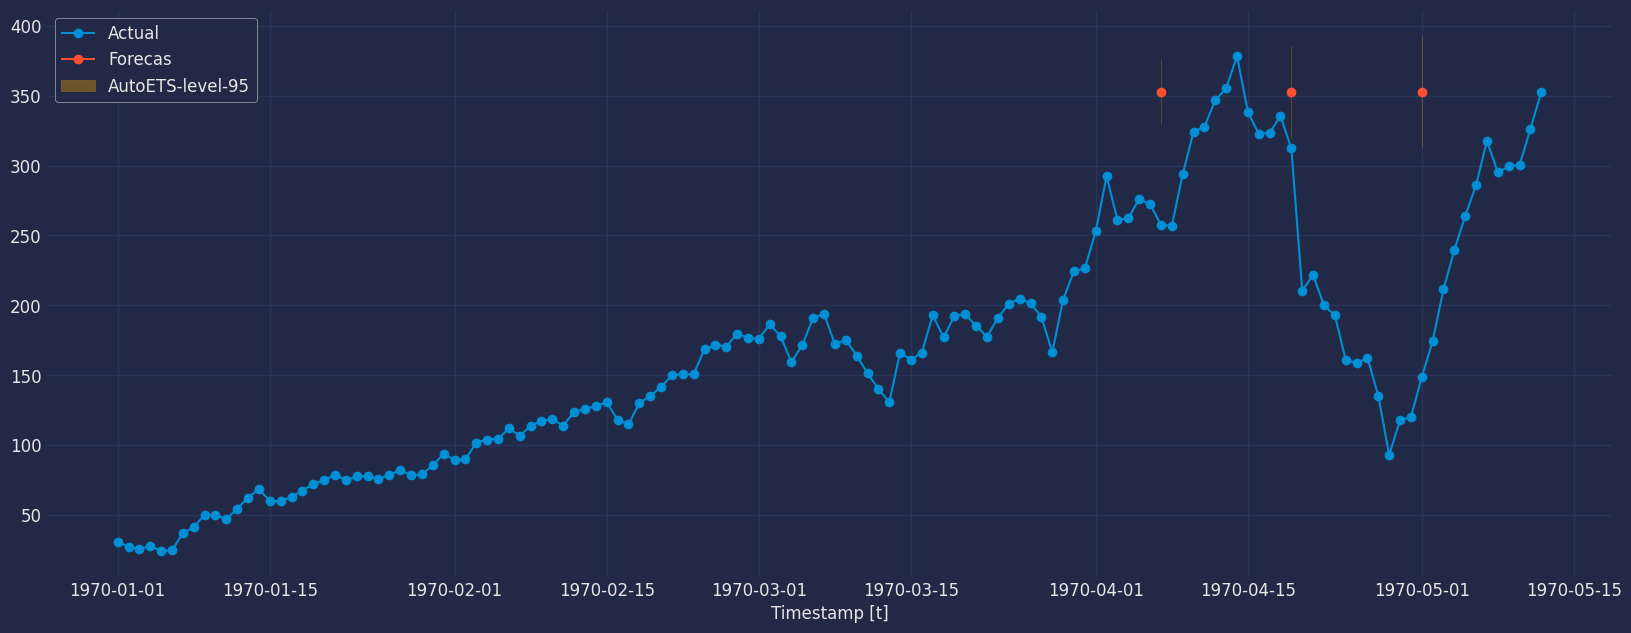

In [26]:

fig, ax = plt.subplots()
plt.plot_date(df_plot.index, df_plot["y"],label="Actual", linestyle="-")
plt.plot_date(df_plot.index, df_plot["hat"],label="Forecas", linestyle="-")
ax.fill_between(df_plot.index,
                df_plot['lo-80'],
                df_plot['hi-80'],
                alpha=.35,
                color='orange',
                label='AutoETS-level-95')
ax.set_title('', fontsize=22)
ax.set_ylabel('', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=12)
plt.legend(fontsize=12)
ax.grid(True)

plt.show()

In [27]:
autoets.predict_in_sample()

{'fitted': array([ 30.92468695,  30.88700671,  27.16857333,  25.50337851,
         27.68642146,  24.27724792,  24.80526221,  36.68834481,
         41.16560982,  50.07832464,  50.05927849,  46.86920027,
         54.48518879,  62.38138575,  68.2539064 ,  60.05998924,
         59.60059373,  63.1096306 ,  67.08760723,  72.43138085,
         74.59518155,  78.80231362,  74.76528869,  77.46648858,
         77.78576519,  75.68233927,  78.73264324,  81.97286625,
         78.53389038,  78.9522363 ,  85.51187144,  93.72697687,
         89.16200134,  89.6300954 , 101.66270653, 103.92685944,
        104.34579093, 111.87240858, 106.59957214, 113.75676864,
        117.22669612, 118.45322359, 113.93740231, 123.56698433,
        125.74119186, 127.88474198, 130.59651529, 118.06577499,
        114.70497936, 129.92728011, 135.13259709, 141.62293183,
        149.79814785, 151.00521986, 150.52682702, 168.74010659,
        171.45350976, 170.35718057, 179.51856924, 176.64841937,
        175.93036966, 186.3279

In [28]:
autoets.forecast(y=train["y"].values, h=6, fitted=True)


{'mean': array([262.35315024, 264.74045905, 267.12776787, 269.51507668,
        271.90238549, 274.28969431]),
 'fitted': array([ 30.15079493,  33.17464999,  30.36787708,  28.54785895,
         30.18932789,  27.46269198,  27.55025895,  37.83869568,
         43.10220431,  51.52207455,  52.64433044,  50.0370817 ,
         56.27071823,  63.94252037,  70.05883282,  63.79961154,
         62.55544936,  65.42153183,  69.24921903,  74.38822433,
         76.95446941,  80.93986635,  77.98735852,  79.92385074,
         80.46160026,  78.71497417,  81.11645353,  84.24325335,
         81.69181706,  81.70825786,  87.38317279,  95.25523703,
         92.37192   ,  92.38655632, 102.79444331, 106.16013206,
        106.97757081, 113.59719467, 109.93221491, 115.62607014,
        119.396851  , 120.96745884, 117.27424576, 125.10241897,
        128.0413189 , 130.29250259, 132.94201393, 122.46313887,
        118.13891705, 130.71835098, 136.92134163, 143.37336524,
        151.31613269, 153.43425809, 153.30687161

In [29]:
autoets.forecast(y=train["y"].values, h=6, fitted=True, level=[95])


{'mean': array([262.35315024, 264.74045905, 267.12776787, 269.51507668,
        271.90238549, 274.28969431]),
 'fitted': array([ 30.15079493,  33.17464999,  30.36787708,  28.54785895,
         30.18932789,  27.46269198,  27.55025895,  37.83869568,
         43.10220431,  51.52207455,  52.64433044,  50.0370817 ,
         56.27071823,  63.94252037,  70.05883282,  63.79961154,
         62.55544936,  65.42153183,  69.24921903,  74.38822433,
         76.95446941,  80.93986635,  77.98735852,  79.92385074,
         80.46160026,  78.71497417,  81.11645353,  84.24325335,
         81.69181706,  81.70825786,  87.38317279,  95.25523703,
         92.37192   ,  92.38655632, 102.79444331, 106.16013206,
        106.97757081, 113.59719467, 109.93221491, 115.62607014,
        119.396851  , 120.96745884, 117.27424576, 125.10241897,
        128.0413189 , 130.29250259, 132.94201393, 122.46313887,
        118.13891705, 130.71835098, 136.92134163, 143.37336524,
        151.31613269, 153.43425809, 153.30687161

In [30]:
autoets.forward(train["y"].values, h=6)



{'mean': array([257.5560135, 257.5560135, 257.5560135, 257.5560135, 257.5560135,
        257.5560135])}

In [31]:
from sklearn import metrics

In [32]:
def model_evaluation(y_true, y_pred, model):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print (f'Model Evaluation: {model}')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}')
    print(f'corr is : {np.corrcoef(y_true, y_pred)[0,1]}',end='\n\n')


In [34]:
# Assuming your test data is sorted chronologically:
y_true_subset = test["y"].values[-len(forecast["hat"]):] # Select the last 'h' values of test set

model_evaluation(y_true_subset, forecast["hat"], "AutoETS")


Model Evaluation: AutoETS
MSE is : 1823.2257493162606
MAE is : 37.66483366180554
RMSE is : 42.699247643445204
MAPE is : 12.384833021996627
R2 is : -3.505650391878481
corr is : -9.419274606927104e-16

